In [1]:
import matplotlib.pyplot as plt
import re

import pandas as pd
import gensim
import numpy as np
from gensim.models import Word2Vec
from time import time  # To time our operations
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import random 

data = pd.read_json("preprocessingDoneRight.json")
data

E:\Anaconda\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


,favorite_count,in_reply_to_user_id_str,is_retweet,retweet_count,text,month,year,hour,week_year,date,modded_text,modded1,noTags_punct,modded1_stemmed
0,202,NaN,False,253,Be sure to tune in and watch Donald Trump on L...,5,2009,18,19,2009-05-04,be sure to tune in and watch donald trump on l...,sure tune watch donald trump late night david ...,be sure to tune in and watch donald trump on l...,sure tune watch donald trump late night...
1,3,NaN,False,2,Donald Trump will be appearing on The View tom...,5,2009,1,19,2009-05-05,donald trump will be appearing on the view tom...,donald trump appearing view tomorrow morning d...,donald trump will be appearing on the view tom...,donald trump appear view tomorrow morn ...
10,13,NaN,False,5,"""Don’t be afraid of being unique - it's like b...",5,2009,15,20,2009-05-17,"""don’t be afraid of being unique - it's like b...",afraid unique like afraid best self donald j t...,don t be afraid of being unique its like bein...,afraid uniqu like afraid best self dona...
100,3,NaN,False,15,The latest update on Bret Michaels is that he'...,5,2010,16,20,2010-05-20,the latest update on bret michaels is that he'...,latest update bret michaels hes making every e...,the latest update on bret michaels is that hes...,latest updat bret michael he make everi...
1000,11,NaN,False,71,China is driving the price of gold up in order...,1,2012,19,1,2012-01-05,china is driving the price of gold up in order...,china driving price gold order ease pressure i...,china is driving the price of gold up in order...,china drive price gold order eas pressu...
10000,95,NaN,False,42,"""@KevinMartinRI: I'm a big fan of the new @rea...",8,2013,3,31,2013-08-02,"""@kevinmartinri: i'm a big fan of the new @rea...",kevinmartinri im big fan new realdonaldtrump t...,kevinmartinri im a big fan of the new realdona...,kevinmartinri im big fan new realdonaldt...
10001,7,NaN,False,14,"""@bobbassman: @realDonaldTrump @anthonyolgin l...",8,2013,3,31,2013-08-02,"""@bobbassman: @realdonaldtrump @anthonyolgin l...",bobbassman realdonaldtrump like bush killed ki...,bobbassman realdonaldtrump like when bush ki...,bobbassman realdonaldtrump like bush kill...
10002,29,NaN,False,40,"""@robocosby: help me @realDonaldTrump I am dep...",8,2013,3,31,2013-08-02,"""@robocosby: help me @realdonaldtrump i am dep...",robocosby help realdonaldtrump depressed keep ...,robocosby help me realdonaldtrump i am depress...,robocosbi help realdonaldtrump depress ke...
10003,158,NaN,False,219,Isn't it sad the way Putin is toying with Obam...,8,2013,3,31,2013-08-02,isn't it sad the way putin is toying with obam...,isnt sad way putin toying obama regarding snow...,isnt it sad the way putin is toying with obama...,isnt sad way putin toy obama regard sn...
10004,21,NaN,False,24,"""@hattakzots: @realDonaldTrump you're one of t...",8,2013,3,31,2013-08-02,"""@hattakzots: @realdonaldtrump you're one of t...",hattakzots realdonaldtrump youre one voices re...,hattakzots realdonaldtrump youre one of the on...,hattakzot realdonaldtrump your one voic ...


In [2]:
#stemmed_words = pd.Series(' '.join(data['modded1']).split()).value_counts()
#print(len(stemmed_words))
#plt.hist(stemmed_words.values,bins=70,log=True)
#plt.show

In [3]:
#stemmed_words = stemmed_words[stemmed_words > 3]
#stemmed_words = stemmed_words[stemmed_words < 3000]
#plt.hist(stemmed_words.values,bins=70,log=True)
#plt.show

In [4]:
#data['m'] = data['modded1'].apply(lambda x: " ".join(x for x in x.split() if x in stemmed_words))
#pd.Series(' '.join(data['m']).split()).value_counts()
#sentences = data[data["year"] == 2016]["m"].tolist()


In [5]:
#don't count words
sentences = data[data["year"] == 2016]["noTags_punct"].tolist()
#sentences = data["noTags_punct"].tolist()

In [6]:
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[i]) for i, _d in enumerate(sentences)]
tagged_data

[TaggedDocument(words=['i', 'will', 'be', 'on', 'foxnews', 'live', 'with', 'members', 'of', 'my', 'family', 'at', '1150', 'pm', 'we', 'will', 'ring', 'in', 'the', 'new', 'year', 'together', 'make', 'america', 'great', 'again'], tags=[0]),
 TaggedDocument(words=['happy', 'new', 'year', 'amp', 'thank', 'you'], tags=[1]),
 TaggedDocument(words=['happy', 'new', 'year', 'from', 'thank', 'you', 'to', 'my', 'great', 'family', 'for', 'all', 'of', 'their', 'support'], tags=[2]),
 TaggedDocument(words=['jallenaip', 'hillary', 'said', 'she', 'was', 'in', 'a', 'fog', 'of', 'war', 'as', 'explanation', 'for', 'the', 'lies', 'about', 'benghazi', 'no', 'fog', 'allowed', 'in', 'wh', 'vote', 'trump', 'potus'], tags=[3]),
 TaggedDocument(words=['sprinklermanus', 'cnn', 'realdonaldtrump', 'theyre', 'spending', 'millions', 'but', 'youre', 'still', 'going', 'to', 'win', 'go', 'donald', 'trump'], tags=[4]),
 TaggedDocument(words=['well', 'the', 'year', 'has', 'officially', 'begun', 'i', 'have', 'many', 'stop

In [7]:
tagged_data[0][0]

['i',
 'will',
 'be',
 'on',
 'foxnews',
 'live',
 'with',
 'members',
 'of',
 'my',
 'family',
 'at',
 '1150',
 'pm',
 'we',
 'will',
 'ring',
 'in',
 'the',
 'new',
 'year',
 'together',
 'make',
 'america',
 'great',
 'again']

In [8]:
#model = Doc2Vec(vector_size=50, min_count=2, epochs=40)
#model = Doc2Vec(vector_size=100, min_count=2, epochs=40)
#model = Doc2Vec(vector_size=200, min_count=2, epochs=40)
model = Doc2Vec(vector_size=500, min_count=4, epochs=100)

model.build_vocab(tagged_data)


In [9]:
%time model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)


Wall time: 28.7 s


In [10]:
#sentences = data[data["year"] == 2016]["noTags_punct"].tolist()
#tagged = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[i]) for i, _d in enumerate(sentences)]

X = []
for i in range(0,len(tagged_data)):
    X.append( model.infer_vector(tagged_data[i].words))

In [11]:
ranks = []
second_ranks = []
for doc_id in range(len(tagged_data)):
    inferred_vector = model.infer_vector(tagged_data[doc_id].words)
    sims = model.docvecs.most_similar([inferred_vector], topn=len(model.docvecs))
    rank = [docid for docid, sim in sims].index(doc_id)
    ranks.append(rank)
    
    second_ranks.append(sims[1])


E:\Anaconda\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [12]:
import collections

collections.Counter(ranks)  # Results vary between runs due to random seeding and very small corpus


Counter({0: 3995,
         5: 14,
         4: 17,
         1: 66,
         6: 15,
         2: 38,
         11: 5,
         7: 6,
         8: 7,
         59: 1,
         15: 3,
         51: 1,
         19: 1,
         17: 2,
         14: 3,
         21: 1,
         16: 3,
         3: 14,
         13: 2,
         10: 3,
         18: 3,
         12: 2,
         24: 1,
         9: 3,
         3654: 1,
         38: 1,
         2628: 1})

In [13]:
print('Document ({}): «{}»\n'.format(doc_id, ' '.join(tagged_data[doc_id].words)))
print(u'SIMILAR/DISSIMILAR DOCS PER MODEL %s:\n' % model)
for label, index in [('MOST', 0), ('SECOND-MOST', 1), ('MEDIAN', len(sims)//2), ('LEAST', len(sims) - 1)]: 
    print(u'%s %s: «%s»\n' % (label, sims[index], ' '.join(tagged_data[sims[index][0]].words)))


Document (4208): «rt realdonaldtrump happy birthday donaldjtrumpjr»

SIMILAR/DISSIMILAR DOCS PER MODEL Doc2Vec(dm/m,d500,n5,w5,mc4,s0.001,t3):

MOST (4208, 0.8886837959289551): «rt realdonaldtrump happy birthday donaldjtrumpjr»

SECOND-MOST (426, 0.8357787132263184): «bradcross4 realdonaldtrump»

MEDIAN (181, 0.37821483612060547): «_bscarb enjoyed watching realdonaldtrump at his rally yesterday ive never seen the bay center that packed»

LEAST (3878, -0.08330997824668884): «obamacarefail»



In [14]:
doc_id = random.randint(0, len(tagged_data) - 1)

# Compare and print the second-most-similar document
print('Train Document ({}): «{}»\n'.format(doc_id, ' '.join(tagged_data[doc_id].words)))
sim_id = second_ranks[doc_id]
print('Similar Document {}: «{}»\n'.format(sim_id, ' '.join(tagged_data[sim_id[0]].words)))


Train Document (4053): «cnn is so embarrassed by their total 100 support of hillary clinton and yet her loss in a landslide that they dont know what to do»

Similar Document (4055, 0.47013989090919495): «i thought that cnn would get better after they failed so badly in their support of hillary clinton however since election they are worse»



In [15]:
from sklearn.metrics import silhouette_score
from nltk.cluster import KMeansClusterer
import nltk

#stemmed counted
#0.112 8 cluster 
#0.12 8 cluster con lunghezza vettore 100
#0.135 8 cluster con lunghezza vettore 200
#0.133 8 cluster con lunghezza vettore 300

#not stemmed counted
#0.135 8 cluster con lunghezza 100
#0.149 8 cluster con lunghezza 200
#0.148 8 cluster con lunghezza 300

#all words not stemmed, no stopwords
#0.114 6 cluster 100
#0.136 8 cluster 100
#0.122 8 cluster 200
#0.144 8 cluster 300


#5 cluster not stemmed, 300, full sembra faccia cluster nicely, 0.14 e passa 
#4 " ", 0.142

#doc2vec trained on whole dataset, lower silhouettes, words?
#4 0.66
#6 0.64

#4 0.79 500/min 4

#usando tutto il dataset, comprese le stopwords fa cacare, la silhouette droppa uns acco


NUM_CLUSTERS = 4
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=40)
%time assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print (assigned_clusters)
d = silhouette_score(X, assigned_clusters,metric='cosine')
print(d)

Wall time: 6min 33s
0.029924339


In [16]:
datak = data[data["year"] == 2016]
datak["labels"] = assigned_clusters
datak

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,favorite_count,in_reply_to_user_id_str,is_retweet,retweet_count,text,month,year,hour,week_year,date,modded_text,modded1,noTags_punct,modded1_stemmed,labels
25967,6735,NaN,False,2108,"I will be on @FoxNews live, with members of m...",1,2016,0,53,2016-01-01,"i will be on @foxnews live, with members of my...",foxnews live members family 1150 pm ring new y...,i will be on foxnews live with members of my f...,foxnew live member famili 1150 pm ring ...,3
25968,8581,NaN,False,3460,HAPPY NEW YEAR &amp; THANK YOU! https://t.co/Y...,1,2016,3,53,2016-01-01,happy new year &amp; thank you! https://t.co/y...,happy new year amp thank,happy new year amp thank you,happi new year amp thank,0
25970,8258,NaN,False,1948,Happy New Year from #MarALago! Thank you to my...,1,2016,6,53,2016-01-01,happy new year from #maralago! thank you to my...,happy new year thank great family support,happy new year from thank you to my great fa...,happi new year thank great famili support,0
25971,7490,NaN,False,2721,"""@jallenaip: Hillary said she was in a ""Fog of...",1,2016,6,53,2016-01-01,"""@jallenaip: hillary said she was in a ""fog of...",jallenaip hillary said fog war explanation lie...,jallenaip hillary said she was in a fog of war...,jallenaip hillari said fog war explan l...,2
25972,3330,NaN,False,933,"""@sprinklermanus: @CNN @realDonaldTrump they'r...",1,2016,21,53,2016-01-01,"""@sprinklermanus: @cnn @realdonaldtrump they'r...",sprinklermanus cnn realdonaldtrump theyre spen...,sprinklermanus cnn realdonaldtrump theyre spen...,sprinklermanu cnn realdonaldtrump theyr s...,2
25973,8495,NaN,False,2642,"Well, the year has officially begun. I have ma...",1,2016,23,53,2016-01-01,"well, the year has officially begun. i have ma...",well year officially begun many stops planned ...,well the year has officially begun i have many...,well year offici begun mani stop plan ...,3
25974,2780,NaN,False,654,"""@marie7777777777: @realDonaldTrump we love u ...",1,2016,23,53,2016-01-01,"""@marie7777777777: @realdonaldtrump we love u ...",marie7777777777 realdonaldtrump love u trump f...,marie7777777777 realdonaldtrump we love u to t...,marie7777777777 realdonaldtrump love u tr...,0
25975,3066,NaN,False,893,"""@JodiL792: We are Standing with you! Spreadin...",1,2016,23,53,2016-01-01,"""@jodil792: we are standing with you! spreadin...",jodil792 standing spreading wordtrump presiden...,jodil792 we are standing with you spreading th...,jodil792 stand spread wordtrump presid 2...,0
25976,3492,NaN,False,881,"""@MEMEoryHead: I'm one of your biggest fans Mr...",1,2016,23,53,2016-01-01,"""@memeoryhead: i'm one of your biggest fans mr...",memeoryhead im one biggest fans mr trump cant ...,memeoryhead im one of your biggest fans mr tru...,memeoryhead im one biggest fan mr trump...,0
25977,3346,NaN,False,922,"""@CASuperrunner: @georgehenryw Huckabee is a g...",1,2016,23,53,2016-01-01,"""@casuperrunner: @georgehenryw huckabee is a g...",casuperrunner huckabee good manbut needs get b...,casuperrunner huckabee is a good manbut he n...,casuperrunn huckabe good manbut need get...,2


In [17]:
clusters_wordCount = []
for cluster in range(0,NUM_CLUSTERS):
    c = datak[datak["labels"] == cluster]
   # words = pd.Series(' '.join(c['m']).split()).value_counts()
    words = pd.Series(' '.join(c['modded1']).split()).value_counts()
    m = words.mean()
    words = words[words > m]
    clusters_wordCount.append(words)
    print("Cluster " + str(cluster) + " dimension " + str(len(c)))

Cluster 0 dimension 982
Cluster 1 dimension 1078
Cluster 2 dimension 1242
Cluster 3 dimension 907


In [18]:
for c in range(0,NUM_CLUSTERS):
    print("cluster ", c , clusters_wordCount[c][0:10])

cluster  0 thank                    567
trump2016                257
makeamericagreatagain    210
great                    208
america                  108
realdonaldtrump          101
amp                      100
trump                     81
new                       77
make                      74
dtype: int64
cluster  1 hillary    306
clinton    177
crooked    159
trump      144
great       81
amp         79
us          75
cruz        61
join        57
never       55
dtype: int64
cluster  2 realdonaldtrump    202
great              158
trump              139
people             116
america            104
make                93
amp                 91
rt                  88
cruz                86
president           83
dtype: int64
cluster  3 great      157
amp        101
big         75
trump       74
enjoy       73
people      65
tonight     65
join        65
hillary     55
new         46
dtype: int64


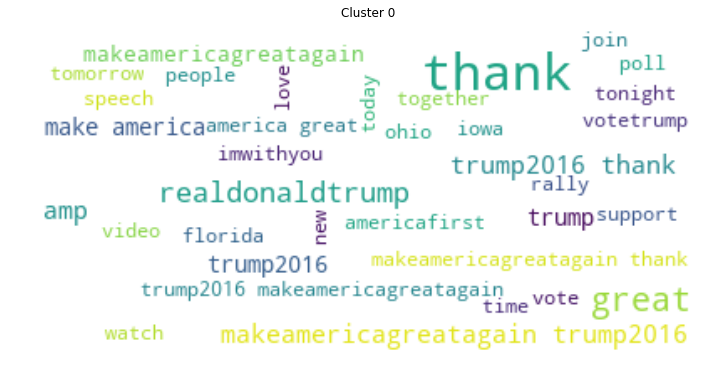

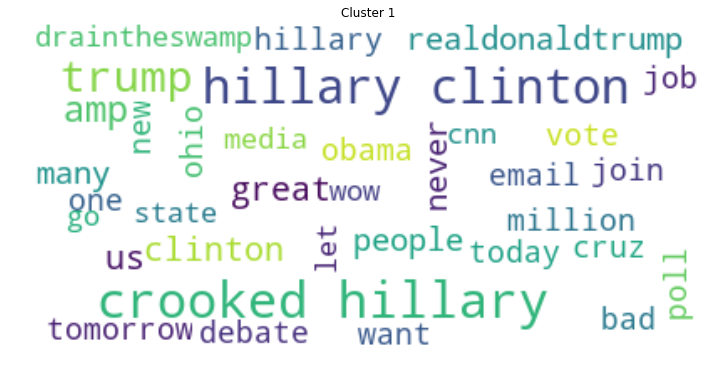

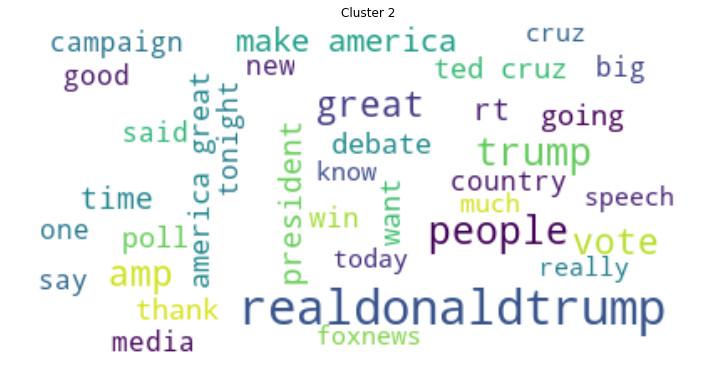

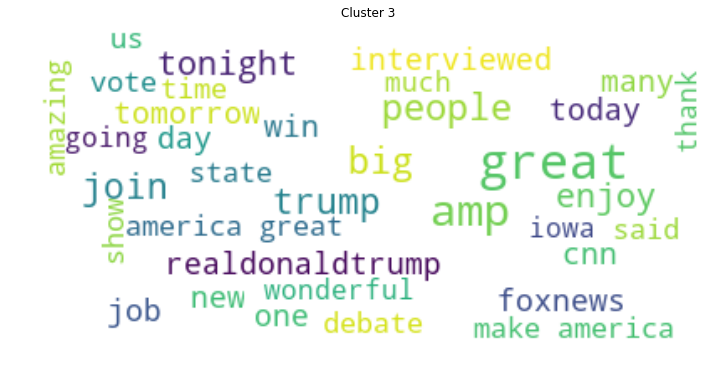

In [19]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

for c in range(0,NUM_CLUSTERS):
    temp = datak[datak["labels"] == c] 
    text = temp["modded1"]
    text = text.str.cat(sep=' ')

    wordcloud = WordCloud(max_font_size=30, max_words=35, background_color="white").generate(text)
    plt.figure(figsize=(12,10))    
    plt.title("Cluster " + str(c))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()


In [20]:
#trova un modo di clusterizzare le cose assieme ai dati / sentiment analysis

In [21]:
datak.to_json("clustered.json")